In [11]:
from vit_att import ViT
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
import numpy as np

In [12]:
img_path = './Dataset/RoughBark/IMG_4842.jpg'

In [13]:
""" Hyperparameters """
hp = {}
hp["image_size"] = 200
hp["num_channels"] = 3
hp["patch_size"] = 25

In [14]:
img = image.load_img(img_path, target_size=(hp["patch_size"], hp["patch_size"]))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Assuming your model expects pixel values in the range [0, 1]


# Print the shape of the image array
print("Original Image Array Shape:", img_array.shape)

Original Image Array Shape: (1, 25, 25, 3)


In [15]:
# hp["num_patches"] = (hp["image_size"] // hp["patch_size"]) ** 2
# Correct the calculation of num_patches
hp["num_patches"] = img_array.size // (hp["patch_size"] * hp["patch_size"] * hp["num_channels"])

hp["flat_patches_shape"] = (hp["num_patches"], hp["patch_size"]*hp["patch_size"]*hp["num_channels"])

hp["batch_size"] = 32
hp["lr"] = 1e-4
hp["num_epochs"] = 1
hp["num_classes"] = 2
hp["class_names"] = ["RoughBark", "StripeCanker"]

hp["num_layers"] = 12
hp["hidden_dim"] = 768
hp["mlp_dim"] = 3072
hp["num_heads"] = 12
hp["dropout_rate"] = 0.1

In [16]:
# Load your ViT model
config = {
    "num_layers": hp["num_layers"],
    "hidden_dim": hp["hidden_dim"],
    "mlp_dim": hp["mlp_dim"],
    "num_heads": hp["num_heads"],
    "dropout_rate": hp["dropout_rate"],
    "num_patches": hp["num_patches"],
    "patch_size": hp["patch_size"],
    "num_channels": hp["num_channels"],
    "num_classes": hp["num_classes"]
}

# Assuming your ViT class is in the vit.py file
model = ViT(config)


In [17]:
# # Flatten and reshape the image array
# img_array = img_array.reshape((1, hp["num_patches"], -1))

# # Make predictions
# predictions = model.predict(img_array)

# # Convert predictions to class labels
# predicted_class = np.argmax(predictions, axis=1)
# confidence_percentage = predictions[0, predicted_class[0]] * 100

# print("Predicted class:", hp["class_names"][predicted_class[0]])
# print("Confidence percentage:", "{:.2f}%".format(confidence_percentage))

In [18]:
# Flatten and reshape the image array
img_array_flat = img_array.reshape((1, -1))
img_array_flat = img_array_flat[:, np.newaxis, :]  # Add a new axis to match the expected shape

# Make predictions
output_tuple = model.predict(img_array_flat)

# Extract predictions and attention weights
predictions = output_tuple[0]  # Assuming predictions are the first element
attention_weights = output_tuple[1:]  # Assuming the rest are attention weights


# Get class predictions
class_predictions = np.argmax(predictions, axis=1)
confidence_percentage = predictions[0, class_predictions[0]] * 100

print("Predicted class:", hp["class_names"][class_predictions[0]])
print("Confidence percentage:", "{:.2f}%".format(confidence_percentage))


Predicted class: RoughBark
Confidence percentage: 68.63%


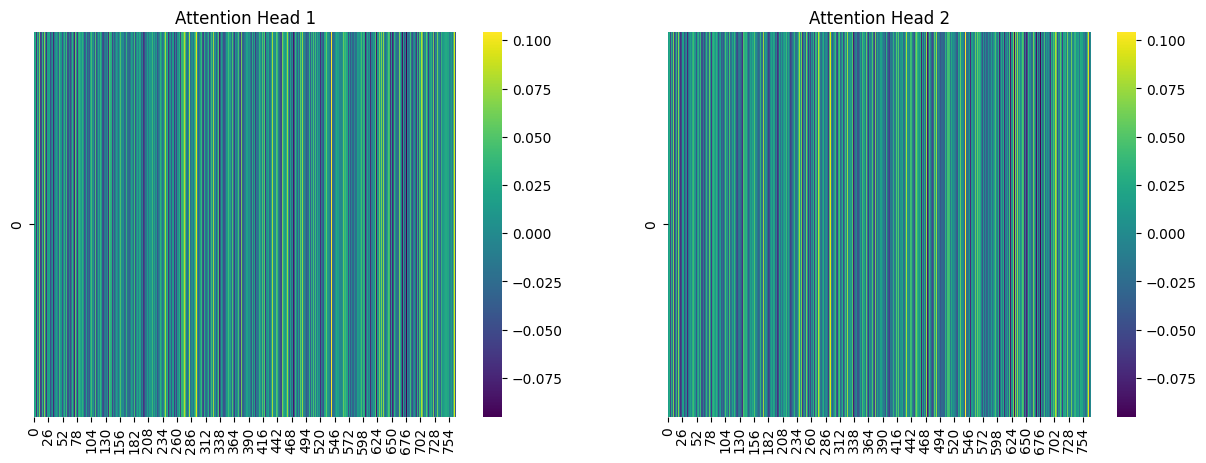

In [19]:


# Assuming attention_weights is a list of attention weights from different layers
final_attention_weights = attention_weights[-1]  # Use attention weights from the last layer

# Reshape the attention weights for visualization
attention_weights_reshaped = final_attention_weights.reshape((2, 768))

# Plot heatmap for each attention head
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

for i in range(2):  # Assuming there are 2 attention heads
    sns.heatmap([attention_weights_reshaped[i]], cmap="viridis", annot=False, ax=axs[i])
    axs[i].set_title(f"Attention Head {i+1}")

plt.show()


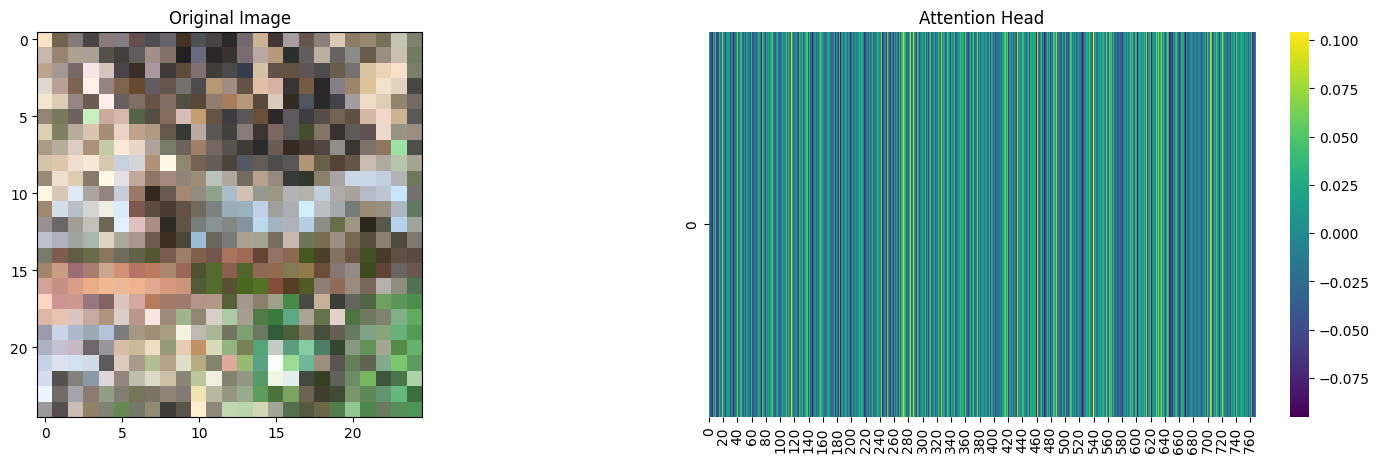

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the original image
original_img = image.load_img(img_path, target_size=(hp["patch_size"], hp["patch_size"]))
original_img_array = image.img_to_array(original_img)
original_img_array /= 255.0

# Plot the original image
plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)
plt.imshow(original_img_array)
plt.title("Original Image")

# Assuming attention_weights is a list of attention weights from different layers
final_attention_weights = attention_weights[-1]  # Use attention weights from the last layer

# Reshape the attention weights for visualization
attention_weights_reshaped = final_attention_weights.reshape((2, 768))

# Plot heatmap for each attention head
# for i in range(2):  # Assuming there are 2 attention heads
#     plt.subplot(1, 3, i + 2)
#     sns.heatmap([attention_weights_reshaped[i]], cmap="viridis", annot=False)
#     plt.title(f"Attention Head")

plt.subplot(1, 3, 2)
sns.heatmap([attention_weights_reshaped[i]], cmap="viridis", annot=False)
plt.title(f"Attention Head")

plt.show()